<a href="https://colab.research.google.com/github/helonayala/sysid/blob/main/ball_and_beam_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read ball and beam data

below we have a couple of code to read data for the ball and beam case study

more details in: [https://www.tecquipment.com/ball-and-beam-apparatus](https://www.tecquipment.com/ball-and-beam-apparatus)

the data is recorded in open loop, whenever the beam reached a certain threshold, it would change the sign of the step, which increases its amplitude after running 3 cycles of positive/negative inputs

more data will be added below for training and testing models

new datasets to come: in closed loop with general purpose signals as reference such as the multi-sine, randomly generated step signals, etc.


In [ ]:
import os
import scipy.io
import numpy as np

file_url = 'https://github.com/helonayala/sysid/raw/refs/heads/main/data/OL_processed_data.mat'
local_filename = os.path.basename(file_url)

# --- 1. Download the .mat file ---
print(f"Downloading {file_url} as {local_filename}...")
# Use -O to specify the output file, overwriting if it exists. -q for quiet.
get_ipython().system(f"rm -f {local_filename}") # Remove if exists to ensure fresh download
get_ipython().system(f"wget -q -O {local_filename} '{file_url}'")

# Check if download was successful
if not os.path.exists(local_filename):
    print(f"Error: File '{local_filename}' not found after attempting download. Please check the URL and wget command.")
else:
    print(f"File '{local_filename}' downloaded successfully.")

    # --- 2. Load the .mat file and Extract Data ---
    try:
        print(f"Loading data from '{local_filename}' using scipy.io.loadmat...")
        mat_data = scipy.io.loadmat(local_filename)
        print("File loaded. Extracting variables uSel and ySel...")

        # Directly access uSel and ySel
        if 'uSel' in mat_data and 'ySel' in mat_data:
            ue = mat_data['uSel'].flatten()
            ye = mat_data['ySel'].flatten()
            print("uSel and ySel extracted successfully.")
        else:
            print("Error: 'uSel' or 'ySel' not found in the .mat file.")
            ue = np.array([])
            ye = np.array([])


    except FileNotFoundError:
        print(f"Error: Could not find '{local_filename}' to load. Ensure download was successful.")
        ue = np.array([])
        ye = np.array([])
    except Exception as e:
        print(f"An unexpected error occurred during data extraction: {e}")
        ue = np.array([])
        ye = np.array([])

# The plotting code is removed as per the user's requirement.

File 'OL_processed_data.mat' downloaded successfully.
Loading data from 'OL_processed_data.mat' using scipy.io.loadmat...
File loaded. Extracting variables uSel and ySel...
uSel and ySel extracted successfully.


## Plot raw data

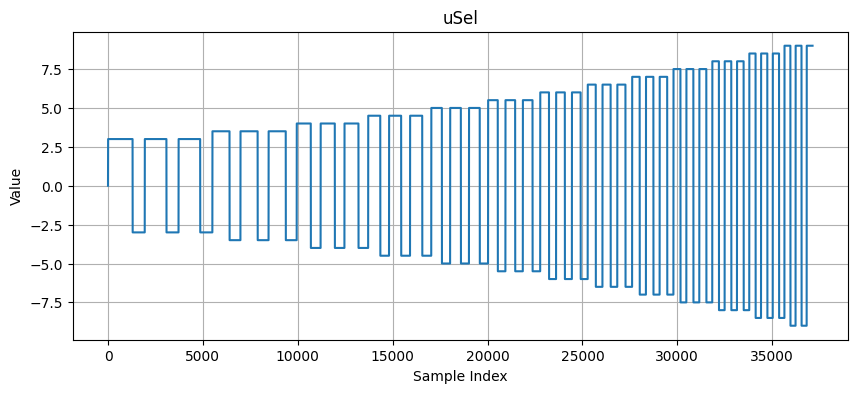

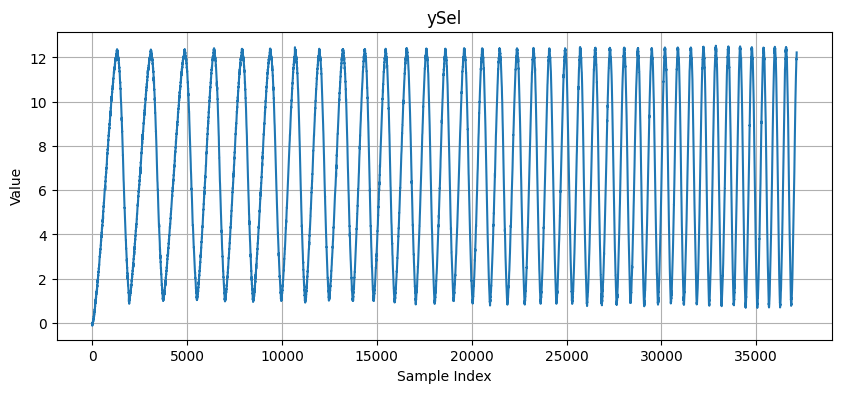

In [ ]:
import matplotlib.pyplot as plt

# Plot uSel
plt.figure(figsize=(10, 4))
plt.plot(ue) # Using ue as it corresponds to uSel from the previous cell
plt.title('uSel')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Plot ySel
plt.figure(figsize=(10, 4))
plt.plot(ye) # Using ye as it corresponds to ySel from the previous cell
plt.title('ySel')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

## Plot specgtrogram for analysis

it is possible to observe that most of the signal is present in very low frequencies, so we will resample data accordingly in order to speed-up the model learning process

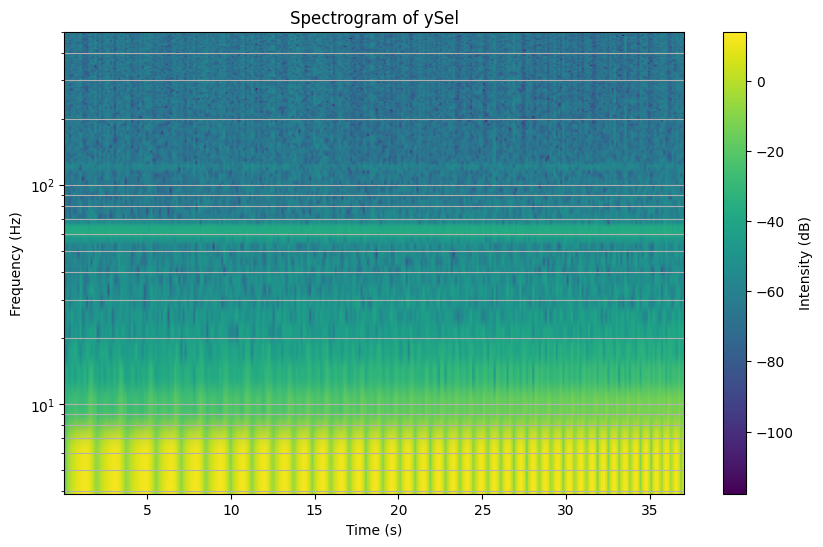

/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


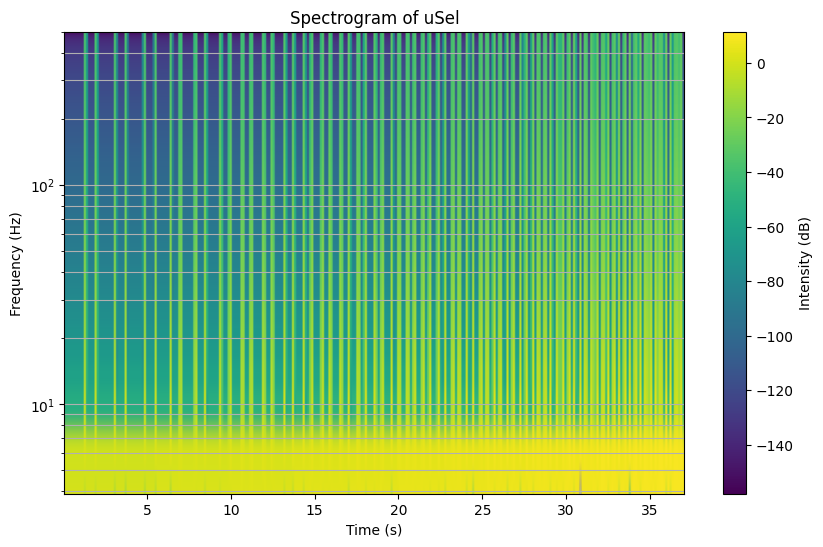

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Spectrogram of ySel (ye)
plt.figure(figsize=(10, 6))
Pyy, freqs, bins, im = plt.specgram(ye, NFFT=256, Fs=1000, noverlap=128) # Fs=1000 assuming 1ms sample time
plt.title('Spectrogram of ySel')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log') # Set frequency axis to logarithmic
plt.colorbar(label='Intensity (dB)')
plt.ylim([freqs[1], freqs[-1]]) # Avoid plotting frequency 0
plt.grid(True, which='both', axis='y')
plt.show()

# Spectrogram of uSel (ue)
plt.figure(figsize=(10, 6))
Puu, freqs, bins, im = plt.specgram(ue, NFFT=256, Fs=1000, noverlap=128) # Fs=1000 assuming 1ms sample time
plt.title('Spectrogram of uSel')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log') # Set frequency axis to logarithmic
plt.colorbar(label='Intensity (dB)')
plt.ylim([freqs[1], freqs[-1]]) # Avoid plotting frequency 0
plt.grid(True, which='both', axis='y')
plt.show()

## Resampling data

simple pre-processing of data, with plots to check whether the signal is good to go

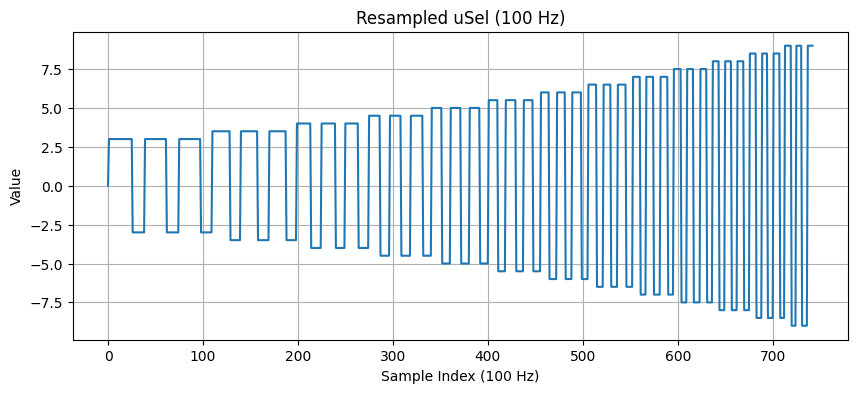

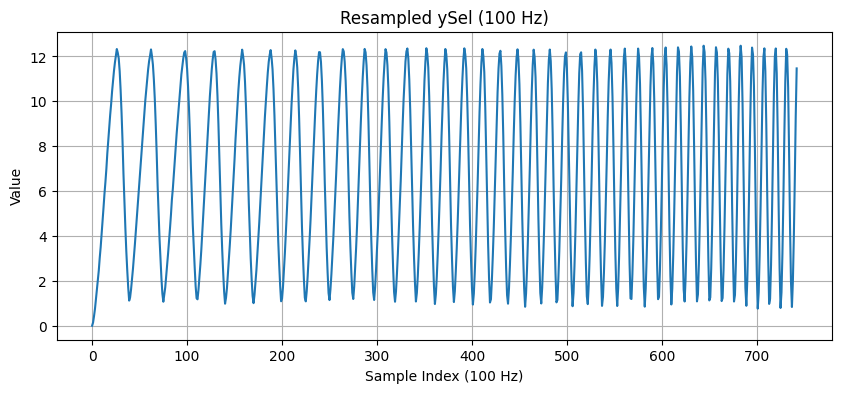

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

factor_resample = 50 # no of samples to divide total downsample

# Resample signals to 1000/factor_resample Hz
ue_resampled = ue[::factor_resample]
ye_resampled = ye[::factor_resample]

# Plot resampled uSel
plt.figure(figsize=(10, 4))
plt.plot(ue_resampled)
plt.title('Resampled uSel (100 Hz)')
plt.xlabel('Sample Index (100 Hz)')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Plot resampled ySel
plt.figure(figsize=(10, 4))
plt.plot(ye_resampled)
plt.title('Resampled ySel (100 Hz)')
plt.xlabel('Sample Index (100 Hz)')
plt.ylabel('Value')
plt.grid(True)
plt.show()

ue = ue_resampled
ye = ye_resampled
